# EDA (Exploratory data analysis)

Sisältää mm.

- identtisten tietueiden etsiminen

JAMK examples #3: 03_eda_sales

Ladataan käytettävät paketit.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Luetaan aineisto:

In [2]:
csvUrl = "https://raw.githubusercontent.com/RaimoHaikari/paikkatieto/master/misc/sales_data.csv"
df = pd.read_csv(csvUrl)

df.head()

,date,category,sales,price,customer_age,customer_gender
0,2023-02-18,Clothing,17,65.53,31,Male
1,2023-05-26,Books,18,431.78,26,NaN
2,2023-02-17,Books,15,400.98,31,Female
3,2023-05-20,Monitors,15,142.19,37,NaN
4,2023-03-31,Monitors,10,399.28,45,NaN


In [3]:
df.dtypes

date                object
category            object
sales                int64
price              float64
customer_age         int64
customer_gender     object
dtype: object

### Aineiston esikäsittely

Tiputetaan NA -arvoja sisältävät tietueet.

In [4]:
# Handle missing values
df = df.dropna()
print(f"Number of rows in data: {df.count()}")

Number of rows in data: date               556
category           556
sales              556
price              556
customer_age       556
customer_gender    556
dtype: int64


Muunnetaan:

- **date** aikaleimaksi.
- **customer_age** kokonaisluvuksi

In [5]:
# Convert data types
df['date'] = pd.to_datetime(df['date'])
df['customer_age'] = df['customer_age'].astype(int)

### Tupla-rivit

Päällekkäisiä tietueita voi etsiä [duplicated -metodin](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html) avulla.

Parametrien avulla voidaan määrittää:

- huomioitavat sarakeet (oletuksena kaikki)
- päällekkäistä tietoa löydettäessä, mitä tietuetta pidetään päällekkäisenä: ensimmäistä-, viimeistä- vaiko kaikkia samoja arvoja sisältäviä

Aineisto ei taida aivan täysin identtisiä rivejä sisältää, mutta testataan käskyä osittaista aineistoa käyttäen.

In [6]:
indices = df.duplicated(subset=['date', 'category','customer_age','customer_gender'], keep = False)
df.loc[indices]

,date,category,sales,price,customer_age,customer_gender
16,2023-03-09,Monitors,12,201.80,61,Male
185,2023-03-09,Monitors,12,81.85,61,Male
269,2023-05-24,Books,11,471.93,32,Male
493,2023-06-26,Computers,13,72.09,45,Male
729,2023-06-26,Computers,13,63.86,45,Male
767,2023-05-24,Books,15,283.48,32,Male


Ajetaan (kuitenkin) mahdolliset tuplatietueet poistava käsky.

In [7]:
# Remove duplicates
df = df.drop_duplicates()

## Poikkeusarvojen käsittely.

Määritetään, että kaikki 95 %:n kvantiilin ylittäviä myyntimääriä pidetään poikkeuksellisen suurina (outlier). Korvataan tällaiset arvot aineiston mediaalia vastaavalla arvolla.

Pandas [quantile()-funktio](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.quantile.html) palauttaa määritettyä kvantiilia vastavan arvon.

In [11]:
threshold = df['sales'].quantile(0.95)
df.loc[df['sales'] > threshold, 'sales'] = df['sales'].median()

## Toiminnon suorittaminen sarakkeelle

Päivitetään sukupuolen kertovan sarakkeen arvot lyhyempään muotoon. Tämä saadaan kätevästi aikaan [map()-funktion](https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html) avulla. Sama onnistuisi myös esim. [replace()-funktiota](https://pandas.pydata.org/docs/reference/api/pandas.Series.replace.html) käyttäen.

Map-funktion kanssa voi käyttää niin kirjastoa kuin lambda-funktiota.

In [13]:
df['customer_gender'] = df['customer_gender'].map({'Male': 'M', 'Female': 'F'})

## Ryhmittely

Lasketaan tuoteryhmien kokonaismyynnit ja  keskihinnat. Tehtävä onnistuu esim. [groupby()-funktiota](https://pandas.pydata.org/docs/reference/api/pandas.Series.groupby.html) käyttäen.

In [15]:
# Calculate total sales by product category
sales_by_category = df.groupby('category')['sales'].sum()

# Calculate mean prices by product category
mean_prices_by_category = df.groupby('category')['price'].mean()

Tulostetaan tuoteryhmien kokonaismyyntejä visualisoiva pylväsdiagrammi.

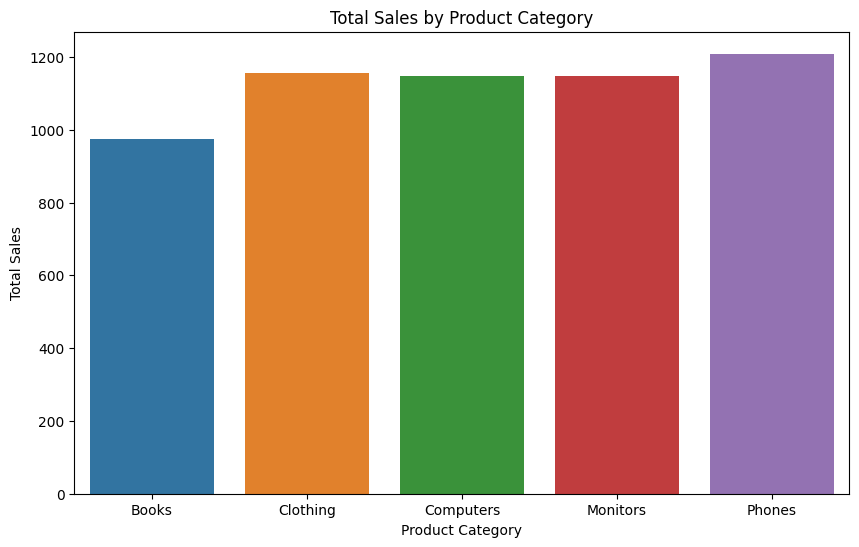

In [19]:
# Visualize sales by category
plt.figure(figsize=(10, 6))
sns.barplot(x=sales_by_category.index, y=sales_by_category.values)
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.title('Total Sales by Product Category')
plt.show()

Sekä tuoteryhmien myyntien keskihintaa kuvaava pylväskaavio.

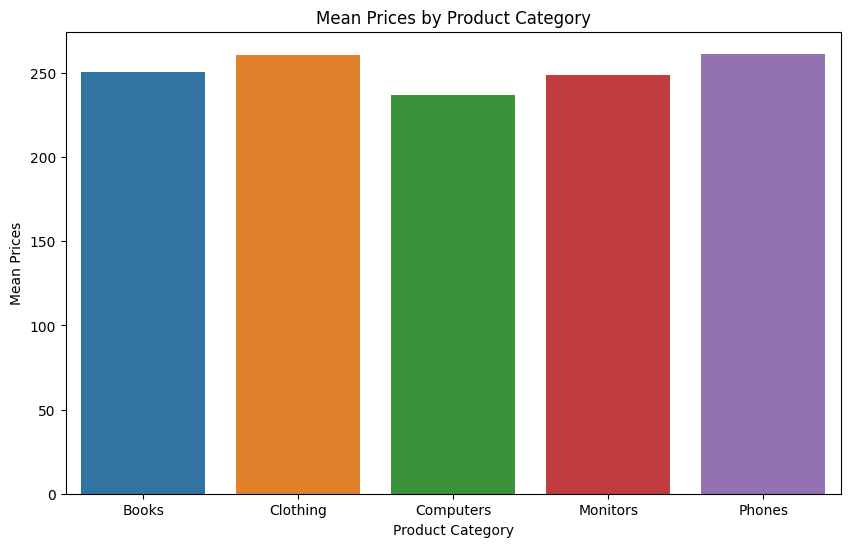

In [20]:
# Visualize mean sales by category
plt.figure(figsize=(10, 6))
sns.barplot(x=mean_prices_by_category.index, y=mean_prices_by_category.values)
plt.xlabel('Product Category')
plt.ylabel('Mean Prices')
plt.title('Mean Prices by Product Category')
plt.show()

Seuraavaksi tulostetaan tuotteiden hinnan ja myyntimäärän yhteyttä kuvaava hajontakuvio. 

(Joka ei kyllä kerro yhtään mitään)

In [ ]:
# Explore the relationship between price and sales
plt.figure(figsize=(8, 6))
sns.scatterplot(x='price', y='sales', data=df)
plt.xlabel('Price')
plt.ylabel('Sales')
plt.title('Relationship between Price and Sales')
plt.show()

Lopuksi asiakkaiden ikäjakaumaa kuvaava histogrammi, jossa pylväät ovat jaoteltu sukupuolen mukaan. 

Esitystapa toimiin paremmin pylväissä alimpana esitettävän luokan kanssa.

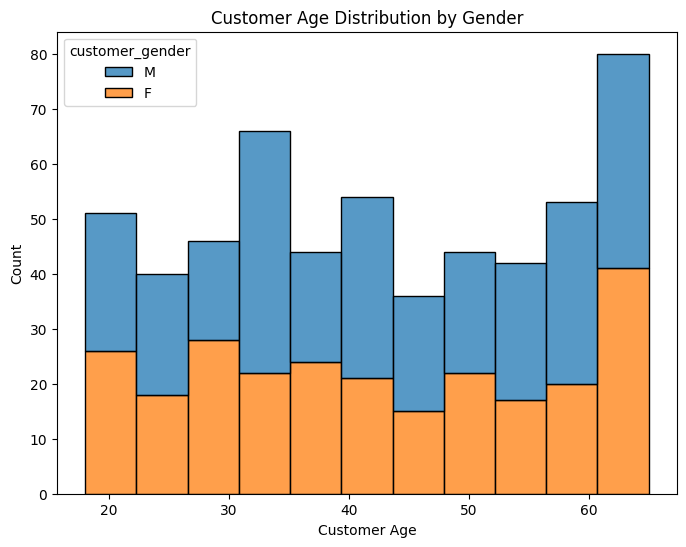

In [23]:

# Analyze customer demographics
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='customer_age', hue='customer_gender', multiple='stack')
plt.xlabel('Customer Age')
plt.ylabel('Count')
plt.title('Customer Age Distribution by Gender')
plt.show()